# Project - Regression Modeling with the Ames Housing Dataset

## Introduction

In this lab, you'll apply the regression analysis and diagnostics techniques covered in this section to the "Ames Housing" dataset. You performed a detailed EDA for this dataset earlier on, and hopefully, you more or less recall how this data is structured! In this lab, you'll use some of the features in this dataset to create a linear model to predict the house price!

## Objectives
You will be able to:
* Perform a linear regression using statsmodels
* Determine if a particular set of data exhibits the assumptions of linear regression
* Evaluate a linear regression model by using statistical performance metrics pertaining to overall model and specific parameters
* Use the coefficient of determination to determine model performance
* Interpret the parameters of a simple linear regression model in relation to what they signify for specific data


## Let's get started

### Import necessary libraries and load 'ames.csv' as a pandas dataframe

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn')
ames = pd.read_csv('ames.csv')

subset = ['YrSold', 'MoSold', 'Fireplaces', 'TotRmsAbvGrd', 'GrLivArea',
          'FullBath', 'YearRemodAdd', 'YearBuilt', 'OverallCond', 'OverallQual', 'LotArea', 'SalePrice']

data = ames.loc[:, subset]

The columns in the Ames housing data represent the dependent and independent variables. We have taken a subset of all columns available to focus on feature interpretation rather than preprocessing steps. The dependent variable here is the sale price of a house `SalePrice`. The description of the other variables is available on [KAGGLE](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). 

### Inspect the columns of the dataset and comment on type of variables present

In [8]:
# Your code here
for col in subset:
#     print(col,'\n')
    print(data[col].value_counts(),'\n')

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64 

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64 

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64 

6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64 

864     22
1040    14
894     11
848     10
1456    10
        ..
3447     1
1396     1
1395     1
1393     1
2054     1
Name: GrLivArea, Length: 861, dtype: int64 

2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64 

1950    178
2006     97
2007     76
2005     73
2004     62
       ... 
2010      6
1983      5
1952      5
1986      5
1951      4
Name: YearRemodAdd, Length: 61, dtype: int64 

2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1906     1
1911     1
1913     1
1917     1
1872     1
Name:

### Record your observations here 
- There are 1460 records total and all are numbers
- first 2 cols are year and month sold. 
- Few of them are Categorical columns like, OverallQual, OverallCond, FullBath, TotRmsAbvGrd
- Other non catergorical cols like, YearRemodAdd are not usefull. or needs to be modified to make sense.
- Other continious random variable, are ['YrSold', 'MoSold', 'Fireplaces', 'GrLivArea', 'YearBuilt', 'LotArea']

### Create histograms for all variables in the dataset and comment on their shape (uniform or not?)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11dcdb2e8>,
      dtype=object)

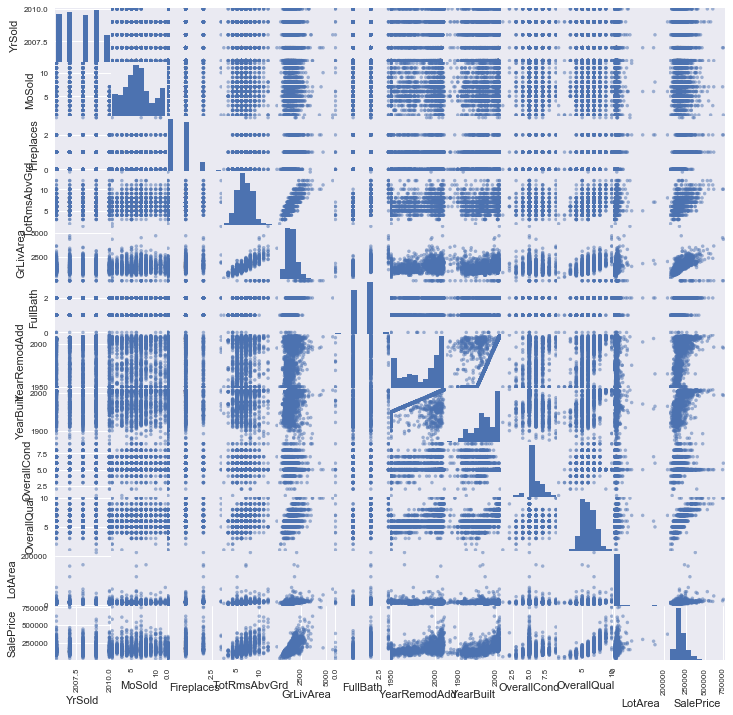

In [12]:
# Your code here 
pd.plotting.scatter_matrix(data, figsize=(12,12))

### My observations 
- Columns with normal distribution are: MoSold, TotRoomsAbvGrd, GrLivArea, SalesPrice, 
    OverallCond, OverallQual (Confusing)
- Skewed data cols are: YearRemodAdd, YearBuilt, LotArea
- Categorical cols are: FullBath, FirePlace, YrSold

### Check the linearity assumption for all chosen features with target variable using scatter plots

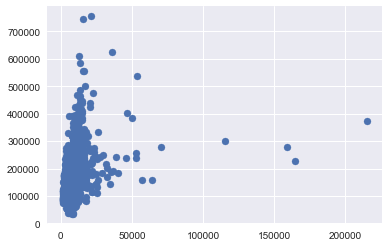

In [14]:
plt.scatter('LotArea', 'SalePrice', data=data)

In [ ]:
# Using the ScatterMatrix above
We will use TotRmsAbvGrd, GrLivArea, YearBuilt, OverallQual ~YearRemodAdd, Fireplaces, FullBath, 

Clearly, your data needs a lot of preprocessing to improve the results. This key behind a Kaggle competition is to process the data in such a way that you can identify the relationships and make predictions in the best possible way. For now, we'll use the dataset untouched and just move on with the regression. The assumptions are not _exactly_ all fulfilled, but they still hold to a level that we can move on. 

### Let's do Regression 

Now, let's perform a number of simple regression experiments between the chosen independent variables and the dependent variable (price). You'll do this in a loop and in every iteration, you should pick one of the independent variables. Perform the following steps:

* Run a simple OLS regression between independent and dependent variables
* Plot the residuals using `sm.graphics.plot_regress_exog()`
* Plot a Q-Q plot for regression residuals normality test 
* Store following values in array for each iteration:
    * Independent Variable
    * r_squared'
    * intercept'
    * 'slope'
    * 'p-value'
    * 'normality (JB)' 
* Comment on each output 

In [24]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as smstats
import scipy.stats as stats
import seaborn as sns

In [58]:
cols = subset.copy()

cols.remove('SalePrice')
f = f'SalePrice~{cols[0]}'
model = smf.ols(f, data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.221
Date:                Thu, 27 Aug 2020   Prob (F-statistic):              0.269
Time:                        03:41:01   Log-Likelihood:                -18543.
No. Observations:                1460   AIC:                         3.709e+04
Df Residuals:                    1458   BIC:                         3.710e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.655e+06   3.14e+06      1.162      0.245   -2.51e+06    9.82e+06
YrSold     -1730.0587   1565.897     -1.105      0.269   -4801.711    1341.593
==============================================================================
Omnibus:                      610.861   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3432.758
Skew:                           1.882   Prob(JB):                         0.00
Kurtosis:                       9.501   Cond. No.                     3.04e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.04e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
['pvalues', 'params', 'rsquared', ]
# x = stats.jarque_bera(model.resid) 
model.rsquared

0.0008365159328423966

In [59]:
# Your code here
df_cols = ['RV', 'r_squared', 'intercept', 'slope', 'p-value', 'normality(JB)']
df = pd.DataFrame(columns= df_cols)
for col in cols:
    f = f'SalePrice~{col}'
    model = smf.ols(f, data).fit()
    dic = {'RV': col, 'r_squared': round(model.rsquared, 3),
          'intercept': round(model.params[0], 2), 'slope': round(model.params[0],2),
          'p-value': round(model.pvalues[1], 5), 
          'normality(JB)': round(stats.jarque_bera(model.resid)[0], 3)}
    df = df.append(dic, ignore_index=True)
df.

,RV,r_squared,intercept,slope,p-value,normality(JB)
0,YrSold,0.001,3654560.37,3654560.37,0.26941,3432.758
1,MoSold,0.002,172295.88,172295.88,0.07613,3588.247
2,Fireplaces,0.218,145648.49,145648.49,0.00000,3092.993
3,TotRmsAbvGrd,0.285,10896.47,10896.47,0.00000,2240.440
4,GrLivArea,0.502,18569.03,18569.03,0.00000,3432.287
5,FullBath,0.314,54388.28,54388.28,0.00000,3515.005
6,YearRemodAdd,0.257,-3692146.17,-3692146.17,0.00000,5931.459
7,YearBuilt,0.273,-2530308.25,-2530308.25,0.00000,6856.947
8,OverallCond,0.006,211909.59,211909.59,0.00291,3406.241
9,OverallQual,0.626,-96206.08,-96206.08,0.00000,5872.098


Clearly, the results are not very reliable. The best R-Squared is witnessed with `OverallQual`, so in this analysis, this is our best predictor. 

### How can you improve these results?
1. Preprocessing 

This is where the preprocessing of data comes in. Dealing with outliers, normalizing data, scaling values etc. can help regression analysis get more meaningful results from the given data. 

2. Advanced Analytical Methods

Simple regression is a very basic analysis technique and trying to fit a straight line solution to complex analytical questions may prove to be very inefficient. Later on, you'll explore multiple regression where you can use multiple features **at once** to define a relationship with the outcome. You'll also look at some preprocessing and data simplification techniques and revisit the Ames dataset with an improved toolkit. 

## Level up - Optional 

Apply some data wrangling skills that you have learned in the previous section to pre-process the set of independent variables we chose above. You can start off with outliers and think of a way to deal with them. See how it affects the goodness of fit. 

## Summary 

In this lab, you applied your skills learned so far on a new data set. You looked at the outcome of your analysis and realized that the data might need some preprocessing to see a clear improvement in the results. You'll pick this back up later on, after learning about more preprocessing techniques and advanced modeling techniques.